In [1]:
import pandas as pd                  
import numpy as np                   
import matplotlib.pyplot as plt     
import seaborn as sns

In [3]:
df= pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df_new = df.drop(['ID#'], axis = 1)
df_new.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
data = df_new.copy()
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
num_cols = [col for col in data.columns if data[col].dtype in ['float64','int64']]
num_cols

['Balance',
 'Qual_miles',
 'cc1_miles',
 'cc2_miles',
 'cc3_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll',
 'Award?']

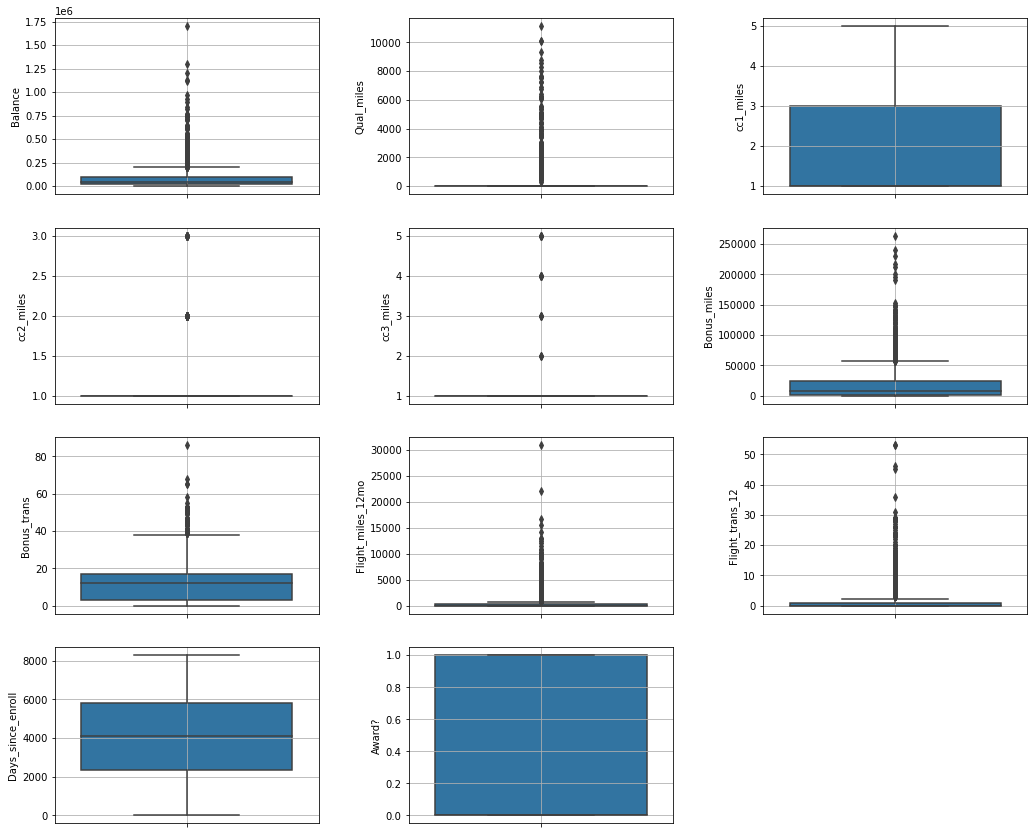

In [11]:
fig = plt.figure(figsize=(15,18))
for index,col in enumerate(data[num_cols]):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col, data=data[num_cols].dropna())
    plt.grid()
fig.tight_layout(pad=3)

In [14]:
from feature_engine.outliers import Winsorizer as wz

In [16]:
winsor = wz(capping_method= 'iqr', tail= 'right', fold = 1.5, variables=(['Balance']))
data['Balance'] = winsor.fit_transform(df[['Balance']])

winsor = wz(capping_method= 'iqr', tail= 'right', fold = 1.5, variables=(['Qual_miles']))
data['Qual_miles'] = winsor.fit_transform(df[['Qual_miles']])

winsor = wz(capping_method= 'iqr', tail= 'right', fold = 1.5, variables=(['cc2_miles']))
data['cc2_miles'] = winsor.fit_transform(df[['cc2_miles']])

winsor = wz(capping_method= 'iqr', tail= 'right', fold = 1.5, variables=(['cc3_miles']))
data['cc3_miles'] = winsor.fit_transform(df[['cc3_miles']])

winsor = wz(capping_method= 'iqr', tail= 'right', fold = 1.5, variables=(['Bonus_miles']))
data['Bonus_miles'] = winsor.fit_transform(df[['Bonus_miles']])

winsor = wz(capping_method= 'iqr', tail= 'right', fold = 1.5, variables=(['Bonus_trans']))
data['Bonus_trans'] = winsor.fit_transform(df[['Bonus_trans']])

winsor = wz(capping_method= 'iqr', tail= 'right', fold = 1.5, variables=(['Flight_miles_12mo']))
data['Flight_miles_12mo'] = winsor.fit_transform(df[['Flight_miles_12mo']])

winsor = wz(capping_method= 'iqr', tail= 'right', fold = 1.5, variables=(['Flight_trans_12']))
data['Flight_trans_12'] = winsor.fit_transform(df[['Flight_trans_12']])

In [17]:
data.var() == 0

Balance              False
Qual_miles            True
cc1_miles            False
cc2_miles             True
cc3_miles             True
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo    False
Flight_trans_12      False
Days_since_enroll    False
Award?               False
dtype: bool

In [18]:
data = data.drop([ 'Qual_miles', 'cc2_miles', 'cc3_miles', ], axis = 1 )

In [19]:
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

data_norm = norm_func(data)

In [20]:
data_norm.describe()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.313793,0.264879,0.267426,0.301858,0.229010,0.236609,0.496330,0.370343
std,0.288722,0.344230,0.313655,0.239871,0.379007,0.377931,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091170,0.000000,0.021692,0.078947,0.000000,0.000000,0.280685,0.000000
50%,0.212072,0.000000,0.124440,0.315789,0.000000,0.000000,0.493610,0.000000
75%,0.454702,0.500000,0.413015,0.447368,0.400000,0.400000,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


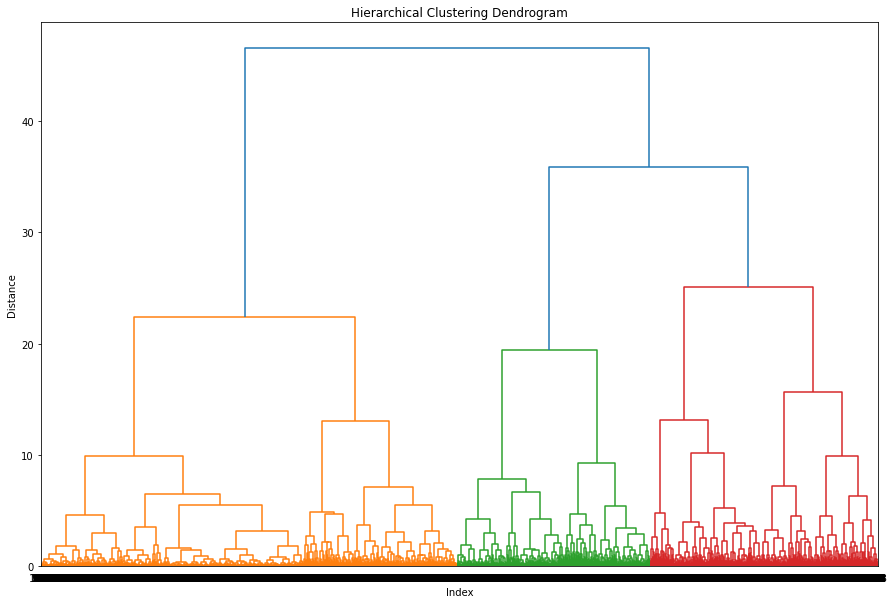

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram
link = linkage(data_norm, method = "ward", metric = "euclidean")

plt.figure(figsize=(15, 10));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dendrogram(link, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering as AC
ward = AC(n_clusters = 3, linkage = 'ward', affinity = "euclidean").fit(data_norm) 
ward.labels_
cluster_labels = pd.Series(ward.labels_)
data['cluster'] =  cluster_labels 
data.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143.0,1,174.0,1.0,0.0,0.0,7000,0,1
1,19244.0,1,215.0,2.0,0.0,0.0,6968,0,1
2,41354.0,1,4123.0,4.0,0.0,0.0,7034,0,1
3,14776.0,1,500.0,1.0,0.0,0.0,6952,0,1
4,97752.0,4,43300.0,26.0,777.5,2.5,6935,1,0


In [27]:
data = pd.concat([df['ID#'], data], axis = 1) 
data= data.iloc[ : , [9,0,1,2,3,4,5,6,7,8]]

In [24]:
data_new = data.iloc[:, :].groupby(data.cluster).mean()
data_new.head()

,ID#,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,
0,1924.086556,86701.077118,2.023020,17645.805479,14.388582,601.397330,1.971455,4308.366483,0.513812
1,2190.523116,50668.051256,1.689950,9417.856156,8.556784,1.798995,0.008543,3783.783417,0.000000
2,1742.756230,65031.400596,2.899242,25701.661430,14.319610,59.964247,0.224810,4617.014085,1.000000


In [26]:
cluster_count = data.cluster.groupby(data.cluster).count()
cluster_count

cluster
0    1086
1    1990
2     923
Name: cluster, dtype: int64

In [28]:
Final = data_new.T
Final

cluster,0,1,2
ID#,1924.086556,2190.523116,1742.756230
Balance,86701.077118,50668.051256,65031.400596
cc1_miles,2.023020,1.689950,2.899242
Bonus_miles,17645.805479,9417.856156,25701.661430
Bonus_trans,14.388582,8.556784,14.319610
Flight_miles_12mo,601.397330,1.798995,59.964247
Flight_trans_12,1.971455,0.008543,0.224810
Days_since_enroll,4308.366483,3783.783417,4617.014085
Award?,0.513812,0.000000,1.000000


In [29]:
Final.columns = ['Cluster 1' , 'Cluster 2', 'Cluster 3']
Final.head()

,Cluster 1,Cluster 2,Cluster 3
ID#,1924.086556,2190.523116,1742.756230
Balance,86701.077118,50668.051256,65031.400596
cc1_miles,2.023020,1.689950,2.899242
Bonus_miles,17645.805479,9417.856156,25701.661430
Bonus_trans,14.388582,8.556784,14.319610
